# Анализ применения огнестрельного оружия в США

Основной датасет:
https://www.kaggle.com/jameslko/gun-violence-data?select=gun-violence-data_01-2013_03-2018.csv

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from scipy import stats
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Подробнее: https://www.kaggle.com/docs/api

try:
    from kaggle.api.kaggle_api_extended import KaggleApi
except:
    !pip install kaggle
    from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [3]:
# Скачаем датасет:
api.dataset_download_files('jameslko/gun-violence-data')
import os
os.listdir('./')

['.ipynb_checkpoints', 'data', 'gun-violence-data.zip', 'Gun_violence.ipynb']

In [4]:
import zipfile
with zipfile.ZipFile('gun-violence-data.zip', 'r') as zip_ref:
    zip_ref.extractall('gun-violence-data')

# Немного о данных

In [5]:
src = './gun-violence-data/gun-violence-data_01-2013_03-2018.csv'
df = pd.read_csv(src)

In [6]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [7]:
# Преобразуем поля столбцов со склеенными данными по нескольким участникам в более удобный вид:
def split_values(val):
    if val is None or pd.isna(val):
        return None
    separator = ':'
    if '::' in val:
        separator = '::'
    separator2 = '|'
    if '||' in val:
        separator2 = '||'
    return [f.split(separator)[1] for f in val.split(separator2)]

for col in [
    'gun_type',
    'participant_age', 'participant_age_group', 'participant_gender', 
    'participant_name', 'participant_relationship', 'participant_status', 'participant_type'
]:
    print(col)
    df[col] = df[col].apply(split_values)

gun_type
participant_age
participant_age_group
participant_gender
participant_name
participant_relationship
participant_status
participant_type


In [8]:
df.head().T

,0,1,2,3,4
incident_id,461105,460726,478855,478925,478959
date,2013-01-01,2013-01-01,2013-01-01,2013-01-05,2013-01-07
state,Pennsylvania,California,Ohio,Colorado,North Carolina
city_or_county,Mckeesport,Hawthorne,Lorain,Aurora,Greensboro
address,1506 Versailles Avenue and Coursin Street,13500 block of Cerise Avenue,1776 East 28th Street,16000 block of East Ithaca Place,307 Mourning Dove Terrace
n_killed,0,1,1,4,2
n_injured,4,3,3,0,2
incident_url,http://www.gunviolencearchive.org/incident/461105,http://www.gunviolencearchive.org/incident/460726,http://www.gunviolencearchive.org/incident/478855,http://www.gunviolencearchive.org/incident/478925,http://www.gunviolencearchive.org/incident/478959
source_url,http://www.post-gazette.com/local/south/2013/0...,http://www.dailybulletin.com/article/zz/201301...,http://chronicle.northcoastnow.com/2013/02/14/...,http://www.dailydemocrat.com/20130106/aurora-s...,http://www.journalnow.com/news/local/article_d...
incident_url_fields_missing,False,False,False,False,False


In [9]:
# Создадим функцию для подсчёта статистик по столбцам:
def value_counts_lst(s: pd.Series):
    res = Counter()
    for data in s:
        if data is not None:
            res.update({val: 1 for val in data})
    return res

def value_counts_describe(s: pd.Series):
    print(f'Total: {s.shape[0]}')
    print(f'<None>: {s.isna().sum()}')
    count = value_counts_lst(s).most_common()
    for val, cnt in count:
        print(f'{val}: {cnt}')
    return count

In [10]:
# Подсчитаем, участников каких возрастов по статистике больше всего:
cnt_age = value_counts_describe(df.participant_age)

Total: 239677
<None>: 92298
19: 10717
20: 10101
18: 9995
21: 9969
22: 9806
23: 9528
24: 9344
25: 8675
26: 7938
17: 7528
27: 7320
28: 6608
29: 6149
30: 5728
31: 5223
32: 5109
16: 5054
33: 4720
34: 4539
35: 4342
36: 3754
37: 3622
38: 3245
15: 3129
39: 2808
40: 2784
41: 2371
42: 2198
43: 2167
44: 2039
45: 1975
14: 1774
46: 1762
48: 1712
47: 1698
50: 1547
49: 1532
51: 1392
52: 1372
53: 1351
54: 1233
55: 1218
56: 1038
57: 962
13: 954
58: 896
59: 857
60: 815
61: 707
62: 635
63: 576
12: 517
64: 493
65: 481
67: 407
3: 405
66: 394
68: 386
11: 385
4: 362
2: 333
10: 325
71: 320
69: 314
70: 314
7: 308
5: 306
9: 300
8: 288
6: 285
72: 235
73: 224
1: 218
75: 206
74: 204
76: 194
77: 148
80: 122
81: 115
79: 114
78: 113
0: 88
83: 87
82: 84
84: 76
85: 68
86: 57
87: 46
88: 41
89: 39
90: 32
91: 20
92: 16
94: 12
93: 7
96: 6
95: 5
99: 3
101: 2
97: 2
98: 1
100: 1
209: 1
311: 1


In [11]:
# Подсчитаем, участников какого пола у нас больше:
cnt_age = value_counts_describe(df.participant_gender)

Total: 239677
<None>: 36362
Male: 194135
Female: 37692
Male, female: 1


([<matplotlib.patches.Wedge at 0x1b5001a81f0>,
 [Text(-0.9595990924632395, 0.5377449039681615, 'Male'),
  Text(0.9595991176368939, -0.5377448590460859, 'Female')])

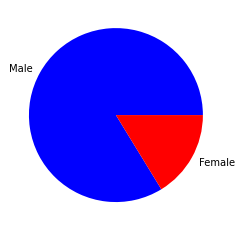

In [12]:
# ... и построим диаграмму:
plt.pie([194135, 37692], labels=['Male', 'Female'], colors=['b', 'r'])

# Гипотеза №1: законы штатов и процент населения, участвовавшего в инцидентах

В разных штатах США разные законы на ношение оружия: constitutional carry (свободное ношение), shall-issue (лицензия необходима, но её легко получить), may-issue (лицензия необходима, и нужно доказать необходимость её получения) и no permit (ношение оружия запрещено). Предположим, что данная политика влияет на количество инцидентов с применением огнестрельного оружия, и проверим это на практике с помощью z-критерия для пропорций. Наши гипотезы будут звучать так:
H0 - процент людей, участвовавших в инцидентах с применением оружия, будет везде одинаков;
H1 - процент людей, участвовавших в инцидентах с применением оружия, в штатах с разной политикой ношения оружия будет значимо различаться.

In [13]:
# Возьмём ещё одну табличку с политикой ношения оружия по штатам:
src2 = './data/concealed_carry.csv'
df_permit2 = pd.read_csv(src2)
df_permit2.head()

,State,concealedCarry
0,Alabama,shall_issue
1,Alaska,consitutional_carry
2,Arizona,consitutional_carry_all
3,Arkansas,shall_issue_all
4,California,may_issue


In [14]:
# Подсчитаем,какое количество штатов использует ту или иную политику:  
df_permit2.concealedCarry.value_counts()

shall_issue_all            27
shall_issue                 7
may_issue_all               6
consitutional_carry_all     6
consitutional_carry         2
may_issue                   2
no_permit                   1
Name: concealedCarry, dtype: int64

In [15]:
# Агрегируем данные более удобным образом: 
df_permit2['permission'] = df_permit2.concealedCarry.str.replace('_all', '')

In [16]:
df_permit2.permission.value_counts()

shall_issue            34
consitutional_carry     8
may_issue               8
no_permit               1
Name: permission, dtype: int64

In [17]:
# Возьмём табличку с численностью населения по штатам:
src3 = './data/usa_population_2018.csv'
df_population = pd.read_csv(src3).set_index('Location')
df_population.head()

,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
Location,,,,,,,
United States,75877700,28020700,39590700.0,81990600,41897600,51121200,318498500
Alabama,1128300,419500,554400.0,1192600,646800,811000,4752600
Alaska,191100,62200,93400.0,182800,94100,85500,709100
Arizona,1706300,645900,841100.0,1702900,862200,1245900,7004300
Arkansas,728600,255200,345400.0,722800,380200,489100,2921300


In [18]:
# Создадим отдельный столбец для подсчёта количества человек, участвовавших в инциденте в качестве подозреваемых преступников:
df['n_suspects'] = df.participant_type.apply(lambda x: sum(s == 'Subject-Suspect' for s in x) if x is not None else None)

In [19]:
# Создадим отдельную табличку, в которой будет указано количество инцидентов и количество участвовавших в них подозреваемых
# преступников по штатам:
incident_stats = df.groupby('state')[['incident_id', 'n_suspects']].agg({'incident_id': 'count', 'n_suspects': 'sum'})
incident_stats.head()

,incident_id,n_suspects
state,,
Alabama,5471,4373.0
Alaska,1349,1136.0
Arizona,2328,1869.0
Arkansas,2842,2470.0
California,16306,13473.0


In [20]:
# Объединим все три таблички:
agg_df = df_permit2.join(
    df_population, 'State').join(
    incident_stats, 'State'
)

In [21]:
# Создадим новую табличку с группировкой по политике ношения оружия, где будет указано общее число жителей,
# количество инцидентов, а также количество подозреваемых участников инцидентов для каждого типа политики:
tmp_agg = agg_df.groupby('permission')[['Total', 'incident_id', 'n_suspects']].sum()

In [22]:
# Создадим новый столбец с процентом людей, участвоваших в инцидентах в качестве подозреваемых, относительльно общего
# числа жителей:
tmp_agg['pct_susp'] = tmp_agg.n_suspects / tmp_agg.Total
tmp_agg

,Total,incident_id,n_suspects,pct_susp
permission,,,,
consitutional_carry,23704100,19498.0,16581.0,0.000699
may_issue,84780600,48225.0,40241.0,0.000475
no_permit,600600,472.0,432.0,0.000719
shall_issue,211909800,168287.0,140067.0,0.000661


In [23]:
# Зададим функцию подсчитывания z-критерия для пропорций, определив при этом уровень значимости с помощью
# поправки Бонферрони, т.к. у нас всего три сравнения:
def two_sided_z_crit_result(p1, p2, N1, N2, significance = 0.05 / 3):
    z_crit_left = stats.norm.ppf(significance / 2)
    z_crit_right = -stats.norm.ppf(significance / 2)
    p = (N1 * p1 + N2 * p2) / (N1 + N2) 
    z = np.sqrt(N1 * N2 / (N1 + N2)) * ((p1 - p2) / np.sqrt(p * (1 - p)))
    if z < z_crit_left or z > z_crit_right:
        print("Разница значима")
    else:
        print("Нет значимой разницы")

In [24]:
# Сравним штаты, где разрешено свободное ношение оружия, и штаты, где могут выдать лицензию, если доказать необходимость её иметь: 
first = 'consitutional_carry'
second = 'may_issue'
two_sided_z_crit_result(
    tmp_agg.loc[first, 'pct_susp'], tmp_agg.loc[second, 'pct_susp'],
    tmp_agg.loc[first, 'Total'], tmp_agg.loc[second, 'Total']
)

Разница значима


In [25]:
# Сравним штаты, где разрешено свободное ношение, и штаты, где выдадут лицензию по запросу:
first = 'consitutional_carry'
second = 'shall_issue'
two_sided_z_crit_result(
    tmp_agg.loc[first, 'pct_susp'], tmp_agg.loc[second, 'pct_susp'],
    tmp_agg.loc[first, 'Total'], tmp_agg.loc[second, 'Total']
)

Разница значима


In [26]:
# Сравним штаты, где могут выдать и где, вероятнее всего, выдадут лицензию на ношение оружия:
first = 'may_issue'
second = 'shall_issue'
two_sided_z_crit_result(
    tmp_agg.loc[first, 'pct_susp'], tmp_agg.loc[second, 'pct_susp'],
    tmp_agg.loc[first, 'Total'], tmp_agg.loc[second, 'Total']
)

Разница значима


Таким образом, оказывается, что политика штатов в области регулирования приобретения и ношения оружия действительно влияет на количество индицентов с применением огнестрельного оружия.

# Гипотеза №2: отношения между участниками и количество жертв

Инциденты с применением оружия происходят по разным причинам: семейная ссора, выяснение отношений между партнёрами или вооружённое ограбление. Попробуем выяснить, есть ли какая-то связь между типом преступления и количеством пострадавших в нём, используя t-критерий.
Наши гипотезы:
H0 - разницы в количестве жертв между разными типами преступлений нет;
H1 - есть значимая разница между типом преступления и количеством пострадавших в нём.

## 1) Связь взаимоотношений между нападавшим и жертвой с количеством убитых

In [27]:
# Посмотрим, какие у нас есть типы взаимоотношений между нападавшим и жертвой:
df.participant_relationship.value_counts()

[Significant others - current or former]                                                                                                                                                                                                                              3445
[Family]                                                                                                                                                                                                                                                              3412
[Armed Robbery]                                                                                                                                                                                                                                                       2475
[Armed Robbery, Armed Robbery]                                                                                                                                                                         

In [28]:
# Приведём данные в более удобный вид:
df['our_participant_relationship'] = df.participant_relationship.apply(lambda x: x[0] if x is not None else None)
df.our_participant_relationship.value_counts()

Armed Robbery                                4707
Family                                       3480
Significant others - current or former       3459
Friends                                      1043
Aquaintance                                   941
Neighbor                                      701
Home Invasion - Perp Does Not Know Victim     676
Home Invasion - Perp Knows Victim             295
Gang vs Gang                                  286
Co-worker                                     137
Drive by - Random victims                      31
Mass shooting - Perp Knows Victims              9
Mass shooting - Random victims                  9
Name: our_participant_relationship, dtype: int64

In [29]:
# Сгруппируем данные по мотиву преступления, посчитаем общее число инцидентов в каждой группе и среднее число убитых в одном
# инциденте:
df.groupby('our_participant_relationship')['n_killed'].agg(['count', 'mean']).sort_values('count', ascending=False)

,count,mean
our_participant_relationship,,
Armed Robbery,4707,0.235182
Family,3480,0.807759
Significant others - current or former,3459,0.733738
Friends,1043,0.561841
Aquaintance,941,0.456961
Neighbor,701,0.343795
Home Invasion - Perp Does Not Know Victim,676,0.178994
Home Invasion - Perp Knows Victim,295,0.328814
Gang vs Gang,286,0.496503


In [30]:
# Выделим количество убитых в каждом инциденте в массивы, сгруппированные по типу преступления:
relationship_types = [
    'Armed Robbery', 'Family', 'Significant others - current or former', 
    'Friends', 'Aquaintance', 'Neighbor', 'Home Invasion - Perp Does Not Know Victim', 
    'Home Invasion - Perp Knows Victim', 'Gang vs Gang', 'Co-worker'
]
samples = []
for rel_type in relationship_types:
    current_sample = df[df.our_participant_relationship == rel_type].n_killed.values
    samples.append(current_sample)

In [31]:
# Теперь определим уровень значимости и посчитаем значения t-критерия с помощью поправки Холма-Бонферрони,
# т.к. теперь у нас много сравнений:

def Kholm_Bonferroni(samples, names, alpha = 0.01):
    p_values = []
    for i in range(len(samples)):
        for j in range(i + 1, len(samples)):
            t, p = stats.ttest_ind(samples[i], samples[j])
            p_values.append((min(p, 1 - p), i, j))
    p_values = sorted(p_values, key=lambda x: x[0])
    from pprint import pprint
    cnt = 0
    for idx, (p, i, j) in enumerate(p_values):
        print(f'Сравнение {names[i]} и {names[j]}. ')
        p = min(p, 1 - p)
        if p < alpha  / 2 / (len(p_values) - (idx + 1) + 1):
            cnt += 1
            print('Разница значима.')
        else:
            print('Нет значимой разницы.')
    print(f'Мы выявили значимую разницу в {cnt} из {len(p_values)} сравнений. Процент обнаружения значимой разницы {cnt/len(p_values)}')

In [32]:
Kholm_Bonferroni(samples, relationship_types)

Сравнение Armed Robbery и Family. 
Разница значима.
Сравнение Armed Robbery и Significant others - current or former. 
Разница значима.
Сравнение Armed Robbery и Friends. 
Разница значима.
Сравнение Significant others - current or former и Home Invasion - Perp Does Not Know Victim. 
Разница значима.
Сравнение Family и Home Invasion - Perp Does Not Know Victim. 
Разница значима.
Сравнение Friends и Home Invasion - Perp Does Not Know Victim. 
Разница значима.
Сравнение Armed Robbery и Aquaintance. 
Разница значима.
Сравнение Family и Neighbor. 
Разница значима.
Сравнение Significant others - current or former и Neighbor. 
Разница значима.
Сравнение Family и Aquaintance. 
Разница значима.
Сравнение Aquaintance и Home Invasion - Perp Does Not Know Victim. 
Разница значима.
Сравнение Armed Robbery и Co-worker. 
Разница значима.
Сравнение Significant others - current or former и Aquaintance. 
Разница значима.
Сравнение Armed Robbery и Gang vs Gang. 
Разница значима.
Сравнение Home Invasion -

In [33]:
# Возьмём четыре самых популярных мотива преступления:
close_relationship_types = [
    'Armed Robbery', 'Family', 'Significant others - current or former', 
    'Friends'
]

In [34]:
# Создадим массивы, содержащие количество убитых в каждом инциденте, сгруппированные по выбранным нами типам преступления:
samples_close_kill = []
for rel_type in close_relationship_types:
    current_sample = df[df.our_participant_relationship == rel_type].n_killed.values
    samples_close_kill.append(current_sample)

In [35]:
Kholm_Bonferroni(samples_close_kill, close_relationship_types)

Сравнение Armed Robbery и Family. 
Разница значима.
Сравнение Armed Robbery и Significant others - current or former. 
Разница значима.
Сравнение Armed Robbery и Friends. 
Разница значима.
Сравнение Family и Friends. 
Разница значима.
Сравнение Significant others - current or former и Friends. 
Разница значима.
Сравнение Family и Significant others - current or former. 
Разница значима.
Мы выявили значимую разницу в 6 из 6 сравнений. Процент обнаружения значимой разницы 1.0


## 2) Связь взаимоотношений между нападавшим и жертвой с количеством раненых

In [36]:
# Посмотрим теперь общее число инцидентов и среднее количество раненых в каждом из них по типу преступления:
df.groupby('our_participant_relationship')['n_injured'].agg(['count', 'mean']).sort_values('count', ascending=False)

,count,mean
our_participant_relationship,,
Armed Robbery,4707,0.680901
Family,3480,0.418678
Significant others - current or former,3459,0.361087
Friends,1043,0.461170
Aquaintance,941,0.568544
Neighbor,701,0.398003
Home Invasion - Perp Does Not Know Victim,676,0.486686
Home Invasion - Perp Knows Victim,295,0.494915
Gang vs Gang,286,0.877622


In [37]:
# Выделим количество раненых в каждом инциденте в массивы, сгруппированные по типу преступления:
inj_samples = []
for rel_type in relationship_types:
    current_sample = df[df.our_participant_relationship == rel_type].n_injured.values
    inj_samples.append(current_sample)

In [38]:
Kholm_Bonferroni(inj_samples, relationship_types)

Сравнение Armed Robbery и Significant others - current or former. 
Разница значима.
Сравнение Armed Robbery и Family. 
Разница значима.
Сравнение Significant others - current or former и Gang vs Gang. 
Разница значима.
Сравнение Armed Robbery и Neighbor. 
Разница значима.
Сравнение Family и Gang vs Gang. 
Разница значима.
Сравнение Armed Robbery и Friends. 
Разница значима.
Сравнение Significant others - current or former и Aquaintance. 
Разница значима.
Сравнение Friends и Gang vs Gang. 
Разница значима.
Сравнение Neighbor и Gang vs Gang. 
Разница значима.
Сравнение Armed Robbery и Home Invasion - Perp Does Not Know Victim. 
Разница значима.
Сравнение Family и Aquaintance. 
Разница значима.
Сравнение Home Invasion - Perp Does Not Know Victim и Gang vs Gang. 
Разница значима.
Сравнение Aquaintance и Neighbor. 
Разница значима.
Сравнение Aquaintance и Gang vs Gang. 
Разница значима.
Сравнение Significant others - current or former и Home Invasion - Perp Does Not Know Victim. 
Разница зн

In [39]:
# Возьмём теперь четыре самых популярных мотива преступления:
samples_close_injury = []
for rel_type in close_relationship_types:
    current_sample = df[df.our_participant_relationship == rel_type].n_injured.values
    samples_close_injury.append(current_sample)

In [40]:
Kholm_Bonferroni(samples_close_injury, close_relationship_types)

Сравнение Armed Robbery и Significant others - current or former. 
Разница значима.
Сравнение Armed Robbery и Family. 
Разница значима.
Сравнение Armed Robbery и Friends. 
Разница значима.
Сравнение Significant others - current or former и Friends. 
Разница значима.
Сравнение Family и Significant others - current or former. 
Разница значима.
Сравнение Family и Friends. 
Нет значимой разницы.
Мы выявили значимую разницу в 5 из 6 сравнений. Процент обнаружения значимой разницы 0.8333333333333334


Таким образом, оказывается, что от типа отношений между нападавшим и жертвой действительно зависит количество жертв в инциденте. Причём в вооружённых ограблениях жертв значимо меньше, чем в инцидентах, случившихся между членами семьи, друзьями или партнёрами)

# Гипотеза №3: тип инцидента и количество оружия

Проверим с помощью t-критерия ещё одну идею, связанную с отношениями между участниками, - связь между типом инцидента и количеством единиц оружия, использованном в нём. Наши гипотезы:
H0 - разницы в количестве применённого оружия в разных типах индидентов нет;
H1 - есть значимая разница между количеством единиц использованного оружия в инцидентах разного типа.

In [41]:
# Выделим количество единиц использованного в каждом инциденте оружия в массивы, сгруппированные по типу преступления:
guns_involved_samples = []
for rel_type in close_relationship_types:
    current_sample = df[df.our_participant_relationship == rel_type].n_guns_involved.dropna().values
    guns_involved_samples.append(current_sample)

In [42]:
# Используем снова t-критерий с поправкой Холма-Бонферрони:
Kholm_Bonferroni(guns_involved_samples, close_relationship_types)

Сравнение Armed Robbery и Significant others - current or former. 
Разница значима.
Сравнение Armed Robbery и Friends. 
Разница значима.
Сравнение Family и Significant others - current or former. 
Нет значимой разницы.
Сравнение Family и Friends. 
Нет значимой разницы.
Сравнение Armed Robbery и Family. 
Нет значимой разницы.
Сравнение Significant others - current or former и Friends. 
Нет значимой разницы.
Мы выявили значимую разницу в 2 из 6 сравнений. Процент обнаружения значимой разницы 0.3333333333333333


Оказывается, есть значимая разница между количеством использованного оружия и взаимоотношениями между участниками в таких типах преступлений, как вооружённое ограбление и любовная ссора, вооружённое ограбление и ссора друзей. При этом друзья, члены семьи и партнёры чаще всего используют одно и то же количество единиц оружия.

# Выводы

Итак, мы подробно рассмотрели статистику инцидентов с применением оружия в США и выявили много значимых закономерностей.
Мы узнали о ситуации в разных штатах и городах, составили портрет преступника, основные "мотивы" преступления и рассмотрели самые популярные типы оружия. 
С помощью статистических критериев мы доказали:
1) Связь между законами штатов и количеством инцидентов в них;
2) Зависимость между типом взаимоотношений участников и количеством жертв;
3) Корреляцию между типом взаимоотношений участников и количеством использованного оружия.
Полученные данные дают ясную картину применения оружия в США и, вероятно, могут как-то помочь в снижении количества подобных инцидентов. Например, стоит более внимательно подходить к выдаче лицензий на ношение оружие в штатах и городах, лидирующих по количеству инцидентов; возможно, имеет смысл ввести какой-то возрастной порог, а также сделать более строгие законы по выдаче лицензий.